In [1]:
import pandas as pd
import numpy as np
drone=pd.read_csv("3d_taskr.csv")

In [2]:
drone.head()

,Drone Weight(kg),Battery Capacity (in mAh),Flight Time (in min)
0,1.2,4000,15.6
1,0.8,2500,12.3
2,2.0,5000,20.0
3,1.5,4500,18.7
4,1.0,3000,13.5


In [3]:
drone.describe()

,Drone Weight(kg),Battery Capacity (in mAh),Flight Time (in min)
count,5.000000,5.000000,5.000000
mean,1.300000,3800.000000,16.020000
std,0.469042,1036.822068,3.293478
min,0.800000,2500.000000,12.300000
25%,1.000000,3000.000000,13.500000
50%,1.200000,4000.000000,15.600000
75%,1.500000,4500.000000,18.700000
max,2.000000,5000.000000,20.000000


In [4]:
drone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Drone Weight(kg)           5 non-null      float64
 1   Battery Capacity (in mAh)  5 non-null      int64  
 2   Flight Time (in min)       5 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 252.0 bytes


array([[<Axes: title={'center': 'Drone Weight(kg)'}>,
        <Axes: title={'center': 'Battery Capacity (in mAh)'}>],
       [<Axes: title={'center': 'Flight Time (in min)'}>, <Axes: >]],
      dtype=object)

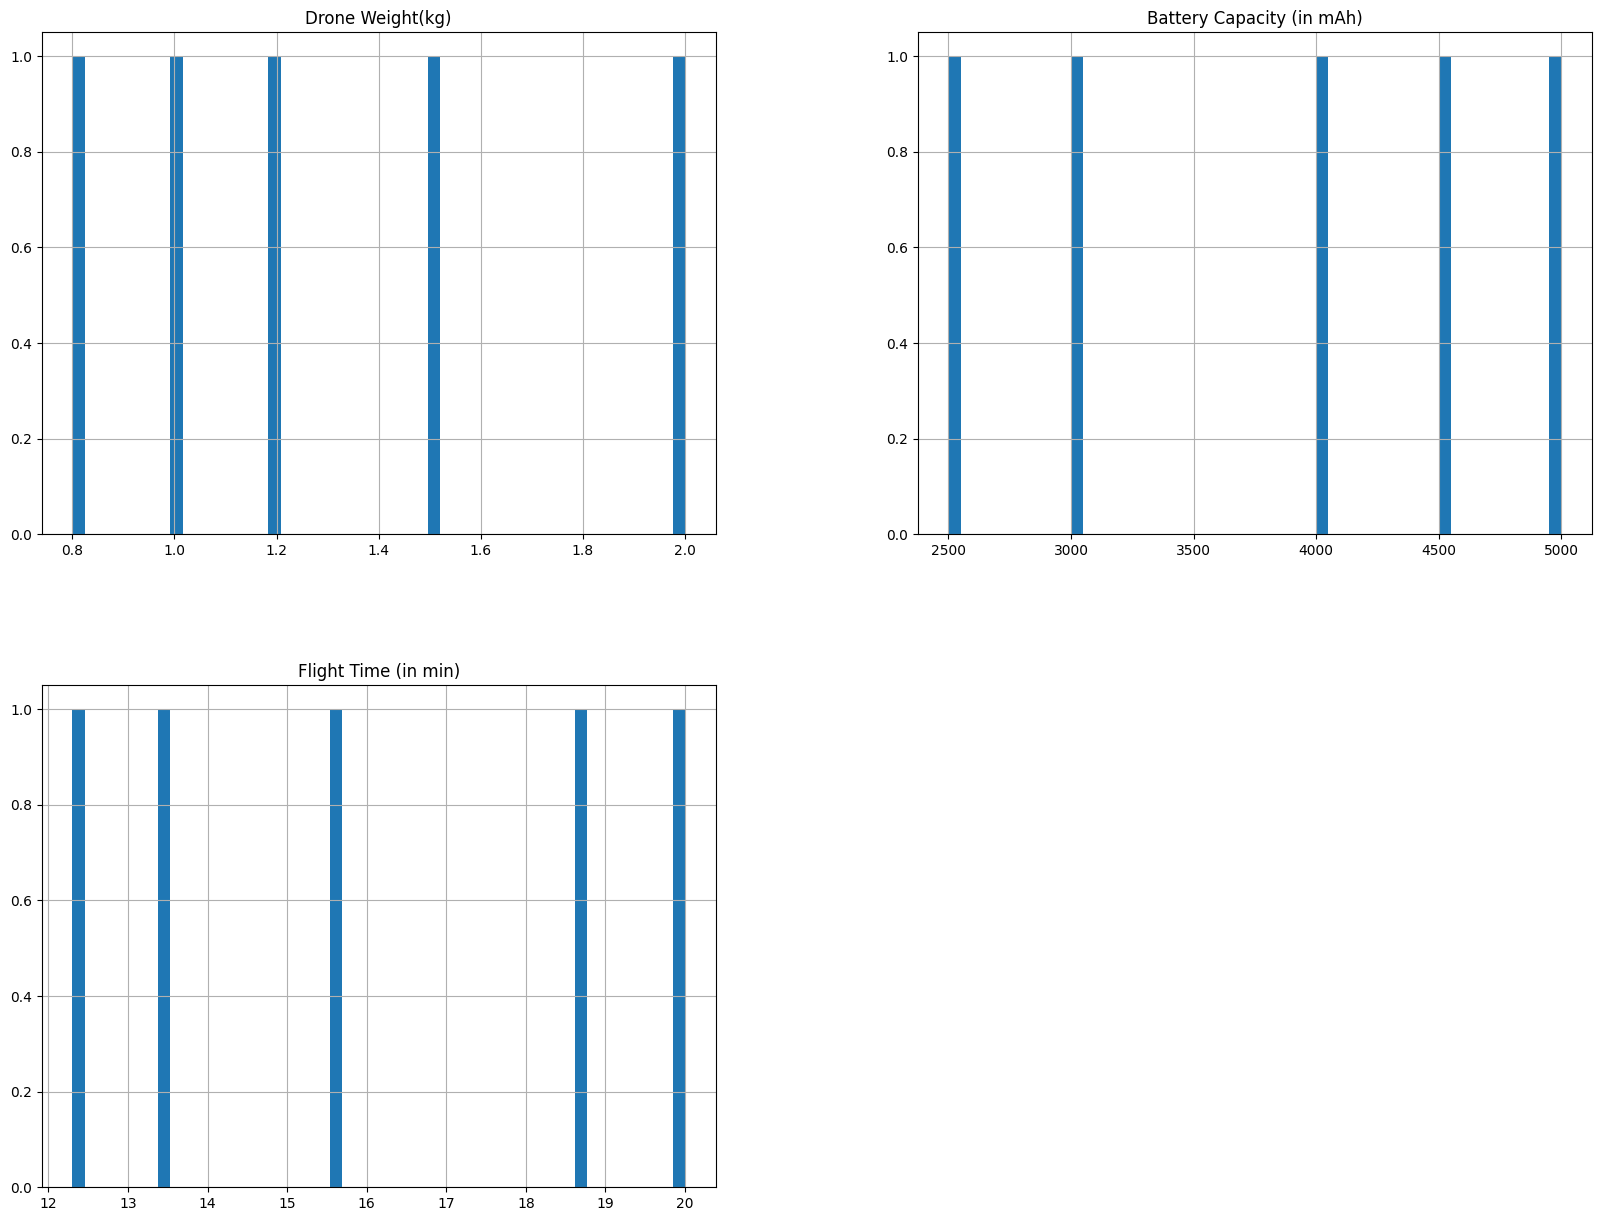

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
drone.hist(bins=50,figsize=(20,15))

In [6]:
def split_train_test(data,test_ratio):
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
train_set , test_set=split_train_test(drone,0.2)

In [8]:
corr=drone.corr()
corr['Battery Capacity (in mAh)'].sort_values(ascending=False)

Battery Capacity (in mAh)    1.000000
Flight Time (in min)         0.982502
Drone Weight(kg)             0.951034
Name: Battery Capacity (in mAh), dtype: float64

<Axes: xlabel='Flight Time (in min)', ylabel='Battery Capacity (in mAh)'>

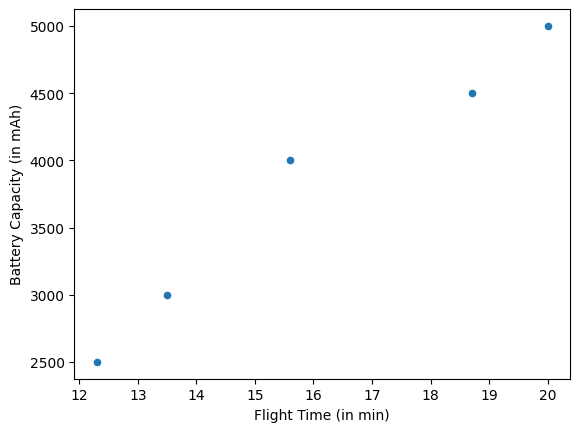

In [9]:
drone.plot(kind='scatter',x='Flight Time (in min)' ,y='Battery Capacity (in mAh)')


In [12]:
import numpy as np
a=np.sum(drone,axis=0)
b=np.std(drone,axis=0)
print(a/len(drone))
print(b/len(drone))
#by z-score method : pt 1,2,5 are outliers

Drone Weight(kg)                1.30
Battery Capacity (in mAh)    3800.00
Flight Time (in min)           16.02
dtype: float64
Drone Weight(kg)               0.083905
Battery Capacity (in mAh)    185.472370
Flight Time (in min)           0.589155
dtype: float64
